In [1]:
%matplotlib inline


# Plot Vertex Data


This plots example vertex data onto an example subject, S1, onto a flatmap
using quickflat. In order for this to run, you have to have a flatmap for
this subject in the pycortex filestore.

The cortex.Vertex object is instantiated with a numpy array of the same size
as the total number of vertices in that subject's flatmap. Each pixel is
colored according to the value given for the nearest vertex in the flatmap.

Instead of the random test data, you can replace this with any array that is
the length of all of the vertices in the subject.

Additionally, if you create a Vertex object using only the number of vertices
that exists in the left hemisphere of the brain, the right hemisphere is
filled in with zeros.


Generating a flatmap cache


OSError: read past end of file

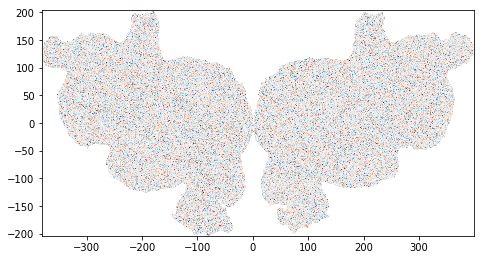

In [2]:
import cortex
import cortex.polyutils
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt

subject = 'S1'

# In order to get the number of vertices in this subject's cortical surface
# we have to load in their surfaces and get the number of points in each
surfs = [cortex.polyutils.Surface(*d)
         for d in cortex.db.get_surf(subject, "fiducial")]

# This is the total number of vertices in both hemispheres combined
num_verts = surfs[0].pts.shape[0] + surfs[1].pts.shape[0]

# Creating a random dataset with one entry for each vertex
test_data = np.random.randn(num_verts)

# This creates a Vertex object for our subject and test dataset
vertex_data = cortex.Vertex(test_data, subject)
# And now we can display it on a flatmap
cortex.quickshow(vertex_data)
plt.show()

# We can also plot just the left hemisphere data
numl = surfs[0].pts.shape[0]
# This creates a Vertex object with an array only as long as the number of
# vertices in the left hemisphere, and the right hemisphere will be filled
# in with zeros
vertex_data_left = cortex.Vertex(test_data[:numl], subject)
cortex.quickshow(vertex_data_left)
plt.show()